In [1]:
#importing libraries
from sklearn import neighbors
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))

In [2]:
import pandas as pd
from datetime import date
from os import listdir
from os.path import isfile, join
import glob
import re
import altair as alt

%matplotlib inline

In [7]:
# importing libraries
import pandas as pd
import numpy as np

# reading the data
#df = pd.read_csv('C:/Users/udayv/OneDrive/Documents/R/test.csv')
df = pd.read_csv('C:/Users/udayv/Downloads/Desktop/Uday_Machine_learning.csv')

# looking at the first five rows of the data
print(df.head())
print('\n Shape of the df:')
print(df.shape)

         Date   Price    Open    High     Low  Change
0  1980-01-01  12.119  12.119  12.119  12.119  0.0045
1  1980-01-02  12.119  12.119  12.119  12.119  0.0045
2  1980-01-03  12.066  12.066  12.066  12.066 -0.0044
3  1980-01-04  12.179  12.179  12.179  12.179  0.0094
4  1980-01-05  12.179  12.179  12.179  12.179  0.0094

 Shape of the df:
(14610, 6)


In [8]:
df=df.drop(['Open','High','Low','Change'], axis=1)

In [9]:
df

,Date,Price
0,1980-01-01,12.1190
1,1980-01-02,12.1190
2,1980-01-03,12.0660
3,1980-01-04,12.1790
4,1980-01-05,12.1790
...,...,...
14605,2019-12-27,79.8615
14606,2019-12-28,79.8615
14607,2019-12-29,79.8615
14608,2019-12-30,79.8715


In [10]:
df['Date'] = pd.to_datetime(df.Date,format='%Y-%m-%d')
df.index = df['Date']

In [11]:
new_data=df

In [12]:
new_data['year']=new_data.Date.dt.year
new_data['month']=new_data.Date.dt.month
new_data['day']=new_data.Date.dt.day


In [13]:
new_data

,Date,Price,year,month,day
Date,,,,,
1980-01-01,1980-01-01,12.1190,1980,1,1
1980-01-02,1980-01-02,12.1190,1980,1,2
1980-01-03,1980-01-03,12.0660,1980,1,3
1980-01-04,1980-01-04,12.1790,1980,1,4
1980-01-05,1980-01-05,12.1790,1980,1,5
...,...,...,...,...,...
2019-12-27,2019-12-27,79.8615,2019,12,27
2019-12-28,2019-12-28,79.8615,2019,12,28
2019-12-29,2019-12-29,79.8615,2019,12,29


In [14]:
new_data=new_data.drop(['Date'], axis=1)

In [15]:
new_data.corr()

,Price,year,month,day
Price,1.000000,0.978410,0.030771,0.002751
year,0.978410,1.000000,0.000117,-0.000134
month,0.030771,0.000117,1.000000,0.010522
day,0.002751,-0.000134,0.010522,1.000000


In [16]:
import seaborn as sn

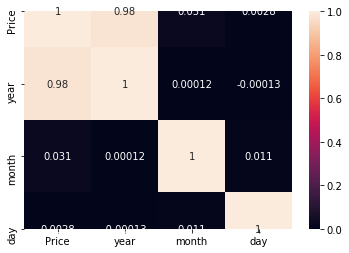

In [17]:
corrMatrix = new_data.corr()
sn.heatmap(corrMatrix, annot=True)

In [18]:
train = new_data[:10956]
valid = new_data[10956:]

In [19]:
print('\n Shape of training set:')
print(train.shape)


 Shape of training set:
(10956, 4)


In [20]:
print('\n Shape of validation set:')
print(valid.shape)



 Shape of validation set:
(3654, 4)


In [21]:
x_train = train.drop('Price', axis=1)
y_train = train['Price']
x_valid = valid.drop('Price', axis=1)
y_valid = valid['Price']

In [22]:
#using gridsearch to find the best parameter
params = {'n_neighbors':[2,3,4,5,6,7,8,9,10,11,12]}
knn = neighbors.KNeighborsRegressor()
model = GridSearchCV(knn, params, cv=5)

In [23]:
#fit the model and make predictions
model.fit(x_train,y_train)
preds = model.predict(x_valid)

In [24]:
#rmse
rms=np.sqrt(np.mean(np.power((np.array(y_valid)-np.array(preds)),2)))
rms

9.270400329407726

In [25]:
Y = y_valid.astype(int)

In [26]:
x = preds.astype(int)

In [27]:
from sklearn.metrics import accuracy_score
acc=accuracy_score(x, Y)
#acc = accuracy_score(y_valid, preds)
print("Accuracy: {:.4%}".format(acc))

Accuracy: 3.9956%


C:\Users\udayv\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
C:\Users\udayv\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


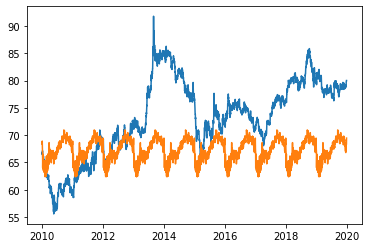

In [28]:
#plot
from matplotlib import pyplot as plt
#valid['Predictions'] = 0
valid['Predictions'] = preds
#plt.plot(train['Price'])
plt.plot(valid[['Price', 'Predictions']])

In [29]:
#implement linear regression
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [30]:
#make predictions and find the rmse
preds = model.predict(x_valid)
rms=np.sqrt(np.mean(np.power((np.array(y_valid)-np.array(preds)),2)))
rms

6.050707192007837

In [31]:
Y = y_valid.astype(int)
preds= preds.astype(int)

In [32]:
from sklearn.metrics import accuracy_score
acc=accuracy_score(Y, preds)
#acc = accuracy_score(y_valid, preds)
print("Accuracy: {:.4%}".format(acc))

Accuracy: 4.2693%


C:\Users\udayv\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\udayv\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


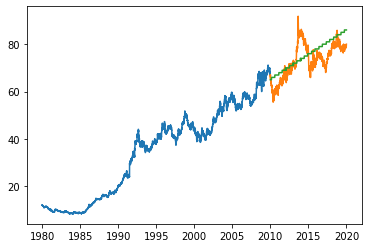

In [33]:
#plot
valid['Predictions'] = 0
valid['Predictions'] = preds

#valid.index = new_data[10956:].index
#train.index = new_data[:10956].index

plt.plot(train['Price'])
plt.plot(valid[['Price', 'Predictions']])

In [ ]:
pip install pyramid-arima

In [ ]:
pip install pmdarima

In [ ]:
from pmdarima.arima import auto_arima

In [ ]:
x_train = train.drop('Price', axis=1)
y_train = train['Price']
x_valid = valid.drop('Price', axis=1)
y_valid = valid['Price']

In [ ]:
training = train['Price']
validation = valid['Price']

In [ ]:
len(training)

In [ ]:
len(validation)

In [ ]:
model = auto_arima(training, start_p=1, start_q=1,max_p=3, max_q=3, m=12,start_P=0, seasonal=True,d=1, D=1, trace=True,error_action='ignore',suppress_warnings=True)
model.fit(training)

forecast = model.predict(n_periods=3654)
forecast = pd.DataFrame(forecast,index = valid.index,columns=['Prediction'])

In [ ]:
rms=np.sqrt(np.mean(np.power((np.array(valid['Price'])-np.array(forecast['Prediction'])),2)))
rms

In [ ]:
#plot
from matplotlib import pyplot as plt
plt.plot(train['Price'])
plt.plot(valid['Price'])
plt.plot(forecast['Prediction'])